# Homework 5 RF Accuracy Improvement

This assignment is inspired by examples of Shan-Hung Wu from National Tsing Hua University.

Requirement: improve the accuracy per feature of the following code from 0.03 up to at least 0.45 and accuracy should be more than 0.92

Here are three hints:

    You can improve the ratio by picking out or "creating" several features.
    Tune hyperparameters
    The ratio can be improved from 0.03 up to 0.47.

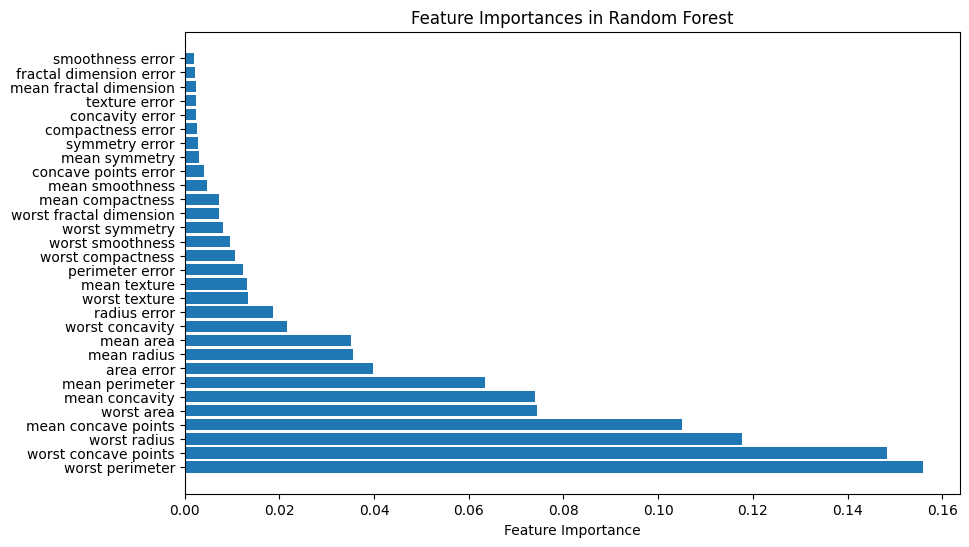

Test Accuracy: 0.9649122807017544
Test Accuracy/Number of Features: 0.4824561403508772
Number of Selected Features: 2
Selected Feature Indices: [22 27]


In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest_pipe = RandomForestClassifier(random_state = 0)

param_dist = {
    'n_estimators': np.unique(np.round(np.logspace(0, 3, num=1000)).astype(int)),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=forest_pipe,
    param_distributions=param_dist,
    n_iter=70,  # Number of random samples
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
feature_importances = best_model.feature_importances_

#Show in plot best features:
importances_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

# Select the top 5% most important features
threshold = np.percentile(feature_importances, 95)
selected_features = np.where(feature_importances >= threshold)[0]
X_selected = X[:, selected_features]

# Split data into training and testing sets using only best features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

#Find best model again using only those features:
random_search = RandomizedSearchCV(
    estimator=forest_pipe,
    param_distributions=param_dist,
    n_iter=70,  # Number of random samples
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy per feature
ratio = test_accuracy / X_selected.shape[1]

print("Test Accuracy:", test_accuracy)
print("Test Accuracy/Number of Features:", ratio)
print("Number of Selected Features:", X_selected.shape[1])
print("Selected Feature Indices:", selected_features)


In [4]:
#Specific attributes of model:
params = best_model.get_params()
for param in params.items():
    print(param)

('bootstrap', True)
('ccp_alpha', 0.0)
('class_weight', None)
('criterion', 'gini')
('max_depth', 5)
('max_features', 'sqrt')
('max_leaf_nodes', None)
('max_samples', None)
('min_impurity_decrease', 0.0)
('min_samples_leaf', 2)
('min_samples_split', 10)
('min_weight_fraction_leaf', 0.0)
('n_estimators', 101)
('n_jobs', None)
('oob_score', False)
('random_state', 0)
('verbose', 0)
('warm_start', False)
